In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate solver matrix

In [34]:
def generate_matrix(num_pts, mode):
    matrix = np.zeros([num_pts, num_pts], dtype="f8")
    for i in range(1, num_pts - 1):
        matrix[i, i - 1] = 1.0 - 0.5 / i
        matrix[i, i + 1] = 1.0 + 0.5 / i
        matrix[i, i] = -2.0 - (mode / i)**2

    if mode == 0:
        matrix[0, 0] = -4.0
        matrix[0, 1] = 4.0
    else:
        matrix[0, 0] = 1.0
        matrix[0, 1] = 0.0
    
    if mode == 0:
        matrix[num_pts - 1, num_pts - 2] = 1.0 - 0.5 / (num_pts - 1)
        matrix[num_pts - 1, num_pts - 1] = -2.0
    else:
        matrix[num_pts - 1, num_pts - 2] = 1.0 - 0.5 / (num_pts - 1)
        matrix[num_pts - 1, num_pts - 1] = -2.0 - (mode / (num_pts - 1))**2 + (1.0 - mode / (num_pts - 1)) * (1.0 + 0.5 / (num_pts - 1))
    return matrix

def smooth(rho, mode):
    num_pts = len(rho)
    rho_smooth = np.zeros(rho.shape)
    for i in range(2, num_pts - 1):
        rho_smooth[i] = 0.25 * (i - 1) * rho[i - 1] + 0.5 * i * rho[i] + 0.25 * (i + 1) * rho[i + 1]
    
    if mode == 0:
        rho_smooth[0] = 0.75 * 0.125 * rho[0] + 0.25 * rho[1]
        rho_smooth[1] = 0.25 * 0.125 * rho[0] + 0.5 * rho[1] + 0.25 * 2.0 * rho[2]
    else:
        rho_smooth[0] = 0.0
        rho_smooth[1] = 0.5 * rho[1] + 0.25 * 2.0 * rho[2]
    
    rho_smooth[num_pts - 1] = 0.25 * (num_pts - 2) * rho[num_pts - 2] + 0.5 * (num_pts - 1) * rho[num_pts - 1]

    for i in range(2, num_pts):
        rho_smooth[i] /= i
    rho_smooth[0] *= 8.0
    
    return rho_smooth


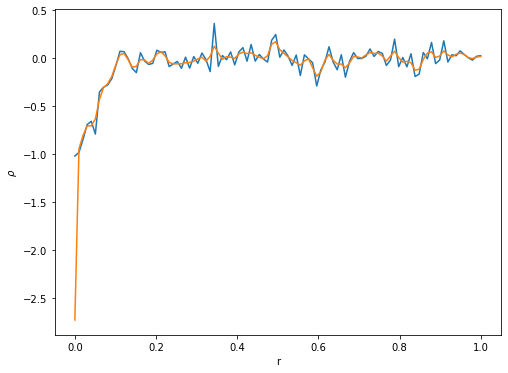

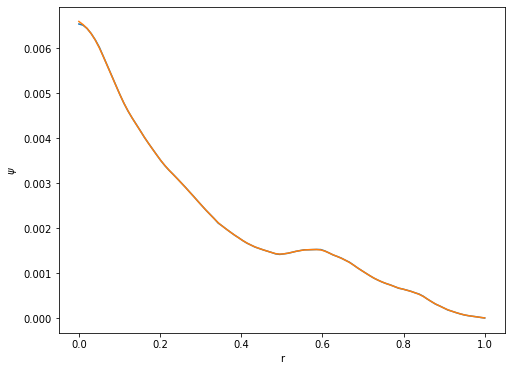

In [39]:
from matplotlib.pyplot import xlabel


nr, rmax, mode = 100, 1.0, 0
r = np.linspace(0.0, rmax, nr)
dr = rmax / nr

# solver matrix
matrix = generate_matrix(nr, mode)

# rho
rho = -np.exp(-0.5 * r**2 / 0.05**2) + 0.1 * np.random.randn(nr)
rho[0] *= 4.0
rho_smooth = smooth(rho, mode)

plt.figure(plt.figure(figsize=[8, 6]))
plt.plot(r, rho)
plt.plot(r, rho_smooth)
plt.xlabel('r')
plt.ylabel(r'$\rho$')

# solve
psi = np.linalg.solve(matrix, rho * dr**2)
psi_smooth = np.linalg.solve(matrix, rho_smooth * dr**2)

plt.figure(figsize=[8, 6])
plt.plot(r, psi, r, psi_smooth)
plt.xlabel('r')
plt.ylabel(r'$\psi$')
plt.show()